In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [24]:
picture_size = 56
folder_path = "C:/Users/sarab/Desktop/Neural_N_CNN/non/images/"

folder_path

'C:/Users/sarab/Desktop/Neural_N_CNN/non/images/'

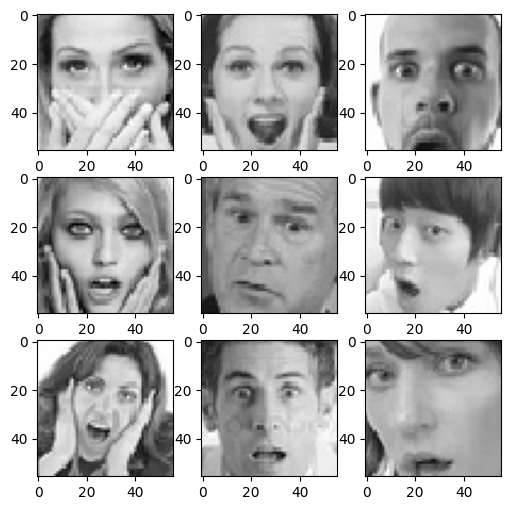

In [25]:
expression = 'surprise'

plt.figure(figsize= (6,6))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [14]:
train_folder = os.path.join(folder_path, "train")
folders = os.listdir(train_folder)

for folder in folders:
    folder_path = os.path.join(train_folder, folder)
    num_images = len(os.listdir(folder_path))
    print(f"Folder: {folder}, Total Images: {num_images}")


Folder: angry, Total Images: 3993
Folder: disgust, Total Images: 436
Folder: fear, Total Images: 4103
Folder: happy, Total Images: 7164
Folder: neutral, Total Images: 4982
Folder: sad, Total Images: 4938
Folder: surprise, Total Images: 3205


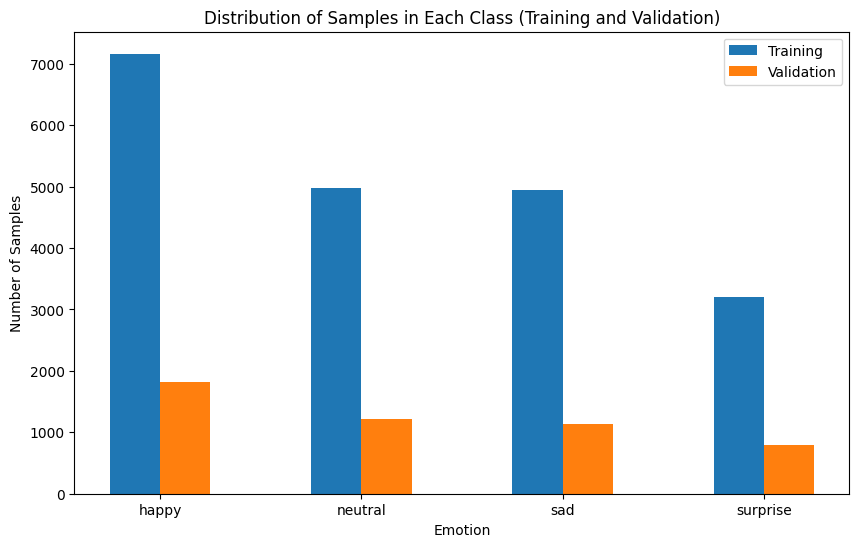

In [11]:
import matplotlib.pyplot as plt

emotions = list(train_class_counts.keys())

fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.25

# Bar positions
train_positions = range(len(emotions))
validation_positions = [pos + bar_width for pos in train_positions]

# Plotting
ax.bar(train_positions, train_class_counts.values(), bar_width, label='Training')
ax.bar(validation_positions, validation_class_counts.values(), bar_width, label='Validation')

# Set labels and title
ax.set_xlabel('Emotion')
ax.set_ylabel('Number of Samples')
ax.set_title('Distribution of Samples in Each Class (Training and Validation)')
ax.set_xticks([pos + bar_width / 2 for pos in train_positions])
ax.set_xticklabels(emotions)
ax.legend()

# Show the plot
plt.show()


In [26]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Set your folder path
folder_path = "C:/Users/sarab/Desktop/Neural_N_CNN/non/images/"

# Set picture size and batch size
picture_size = 56
batch_size = 128

# Create data generators
datagen_train = ImageDataGenerator(
    rescale=1.0 / 255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=20,
    horizontal_flip=True
)

datagen_val = ImageDataGenerator(rescale=1.0 / 255)



In [27]:
train_set = datagen_train.flow_from_directory(
    os.path.join(folder_path, "train"),
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    os.path.join(folder_path, "validation"),
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [33]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (56,56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

###double CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))



model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 56, 56, 64)        640       
                                                                 
 batch_normalization_28 (Ba  (None, 56, 56, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_28 (Activation)  (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 28, 28, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 28, 28, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 128)      

In [34]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("f_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.0001),
              metrics=['accuracy'])

In [35]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\sarab\AppData\Local\Temp\ipykernel_17248\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/50
225/225 [==============================] - ETA: 0s - loss: 1.9575 - accuracy: 0.2188WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 344s 2s/step - loss: 1.9575 - accuracy: 0.2188 - val_loss: 1.8329 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 1.8085 - accuracy: 0.2644WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 383s 2s/step - loss: 1.8085 - accuracy: 0.2644 - val_loss: 2.3963 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - ETA: 0s - loss: 1.6281 - accuracy: 0.3606WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 439s 2s/step - loss: 1.6281 - accuracy: 0.3606 - val_loss: 1.8577 - val_accuracy: 0.3136 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - ETA: 0s - loss: 1.4591 - accuracy: 0.4381WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 432s 2s/step - loss: 1.4591 - accuracy: 0.4381 - val_loss: 1.3691 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - ETA: 0s - loss: 1.3677 - accuracy: 0.4706WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 368s 2s/step - loss: 1.3677 - accuracy: 0.4706 - val_loss: 1.4388 - val_accuracy: 0.4538 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - ETA: 0s - loss: 1.3141 - accuracy: 0.4972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 358s 2s/step - loss: 1.3141 - accuracy: 0.4972 - val_loss: 1.6171 - val_accuracy: 0.3797 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - ETA: 0s - loss: 1.2701 - accuracy: 0.5144WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 360s 2s/step - loss: 1.2701 - accuracy: 0.5144 - val_loss: 1.2475 - val_accuracy: 0.5212 - lr: 0.0010
Epoch 8/50
225/225 [==============================] - ETA: 0s - loss: 1.2401 - accuracy: 0.5276WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 359s 2s/step - loss: 1.2401 - accuracy: 0.5276 - val_loss: 1.2911 - val_accuracy: 0.5031 - lr: 0.0010
Epoch 9/50
225/225 [==============================] - ETA: 0s - loss: 1.2086 - accuracy: 0.5415WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 352s 2s/step - loss: 1.2086 - accuracy: 0.5415 - val_loss: 1.2622 - val_accuracy: 0.5232 - lr: 0.0010
Epoch 10/50
225/225 [==============================] - ETA: 0s - loss: 1.1897 - accuracy: 0.5491WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 365s 2s/step - loss: 1.1897 - accuracy: 0.5491 - val_loss: 1.2217 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 11/50
225/225 [==============================] - ETA: 0s - loss: 1.1708 - accuracy: 0.5569WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 360s 2s/step - loss: 1.1708 - accuracy: 0.5569 - val_loss: 1.1905 - val_accuracy: 0.5374 - lr: 0.0010
Epoch 12/50
225/225 [==============================] - ETA: 0s - loss: 1.1577 - accuracy: 0.5589WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 359s 2s/step - loss: 1.1577 - accuracy: 0.5589 - val_loss: 1.1783 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 13/50
225/225 [==============================] - ETA: 0s - loss: 1.1403 - accuracy: 0.5666WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 360s 2s/step - loss: 1.1403 - accuracy: 0.5666 - val_loss: 1.1738 - val_accuracy: 0.5540 - lr: 0.0010
Epoch 14/50
225/225 [==============================] - ETA: 0s - loss: 1.1216 - accuracy: 0.5732WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 346s 2s/step - loss: 1.1216 - accuracy: 0.5732 - val_loss: 1.2836 - val_accuracy: 0.4942 - lr: 0.0010
Epoch 15/50
225/225 [==============================] - ETA: 0s - loss: 1.1072 - accuracy: 0.5831WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 355s 2s/step - loss: 1.1072 - accuracy: 0.5831 - val_loss: 1.4334 - val_accuracy: 0.4550 - lr: 0.0010
Epoch 16/50
225/225 [==============================] - ETA: 0s - loss: 1.1031 - accuracy: 0.5817WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 355s 2s/step - loss: 1.1031 - accuracy: 0.5817 - val_loss: 1.1314 - val_accuracy: 0.5695 - lr: 0.0010
Epoch 17/50
225/225 [==============================] - ETA: 0s - loss: 1.0830 - accuracy: 0.5912WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 357s 2s/step - loss: 1.0830 - accuracy: 0.5912 - val_loss: 1.1175 - val_accuracy: 0.5781 - lr: 0.0010
Epoch 18/50
225/225 [==============================] - ETA: 0s - loss: 1.0770 - accuracy: 0.5927WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 350s 2s/step - loss: 1.0770 - accuracy: 0.5927 - val_loss: 1.3234 - val_accuracy: 0.4916 - lr: 0.0010
Epoch 19/50
225/225 [==============================] - ETA: 0s - loss: 1.0639 - accuracy: 0.5970WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 349s 2s/step - loss: 1.0639 - accuracy: 0.5970 - val_loss: 1.0639 - val_accuracy: 0.5884 - lr: 0.0010
Epoch 20/50
225/225 [==============================] - ETA: 0s - loss: 1.0563 - accuracy: 0.5982WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 361s 2s/step - loss: 1.0563 - accuracy: 0.5982 - val_loss: 1.0267 - val_accuracy: 0.6139 - lr: 0.0010
Epoch 21/50
225/225 [==============================] - ETA: 0s - loss: 1.0459 - accuracy: 0.6072WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 353s 2s/step - loss: 1.0459 - accuracy: 0.6072 - val_loss: 1.2028 - val_accuracy: 0.5459 - lr: 0.0010
Epoch 22/50
225/225 [==============================] - ETA: 0s - loss: 1.0302 - accuracy: 0.6137WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 353s 2s/step - loss: 1.0302 - accuracy: 0.6137 - val_loss: 1.2411 - val_accuracy: 0.5287 - lr: 0.0010
Epoch 23/50
225/225 [==============================] - ETA: 0s - loss: 1.0229 - accuracy: 0.6149WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 23: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 355s 2s/step - loss: 1.0229 - accuracy: 0.6149 - val_loss: 1.1259 - val_accuracy: 0.5754 - lr: 0.0010
Epoch 24/50
225/225 [==============================] - ETA: 0s - loss: 0.9835 - accuracy: 0.6281WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 354s 2s/step - loss: 0.9835 - accuracy: 0.6281 - val_loss: 0.9662 - val_accuracy: 0.6401 - lr: 2.0000e-04
Epoch 25/50
225/225 [==============================] - ETA: 0s - loss: 0.9603 - accuracy: 0.6390WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 355s 2s/step - loss: 0.9603 - accuracy: 0.6390 - val_loss: 0.9998 - val_accuracy: 0.6200 - lr: 2.0000e-04
Epoch 26/50
225/225 [==============================] - ETA: 0s - loss: 0.9515 - accuracy: 0.6445WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 370s 2s/step - loss: 0.9515 - accuracy: 0.6445 - val_loss: 0.9616 - val_accuracy: 0.6364 - lr: 2.0000e-04
Epoch 27/50
225/225 [==============================] - ETA: 0s - loss: 0.9485 - accuracy: 0.6449WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 361s 2s/step - loss: 0.9485 - accuracy: 0.6449 - val_loss: 0.9648 - val_accuracy: 0.6365 - lr: 2.0000e-04
Epoch 28/50
225/225 [==============================] - ETA: 0s - loss: 0.9359 - accuracy: 0.6444WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 366s 2s/step - loss: 0.9359 - accuracy: 0.6444 - val_loss: 0.9667 - val_accuracy: 0.6364 - lr: 2.0000e-04
Epoch 29/50
225/225 [==============================] - ETA: 0s - loss: 0.9349 - accuracy: 0.6477WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 354s 2s/step - loss: 0.9349 - accuracy: 0.6477 - val_loss: 0.9307 - val_accuracy: 0.6490 - lr: 2.0000e-04
Epoch 30/50
225/225 [==============================] - ETA: 0s - loss: 0.9245 - accuracy: 0.6512WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 359s 2s/step - loss: 0.9245 - accuracy: 0.6512 - val_loss: 0.9625 - val_accuracy: 0.6358 - lr: 2.0000e-04
Epoch 31/50
225/225 [==============================] - ETA: 0s - loss: 0.9230 - accuracy: 0.6524WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 364s 2s/step - loss: 0.9230 - accuracy: 0.6524 - val_loss: 1.0085 - val_accuracy: 0.6206 - lr: 2.0000e-04
Epoch 32/50
225/225 [==============================] - ETA: 0s - loss: 0.9178 - accuracy: 0.6545WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 32: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
225/225 [==============================] - 349s 2s/step - loss: 0.9178 - accuracy: 0.6545 - val_loss: 0.9551 - val_accuracy: 0.6445 - lr: 2.0000e-04
Epoch 33/50
225/225 [==============================] - ETA: 0s - loss: 0.9083 - accuracy: 0.6609WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 361s 2s/step - loss: 0.9083 - accuracy: 0.6609 - val_loss: 0.9182 - val_accuracy: 0.6571 - lr: 4.0000e-05
Epoch 34/50
225/225 [==============================] - ETA: 0s - loss: 0.9126 - accuracy: 0.6574WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 355s 2s/step - loss: 0.9126 - accuracy: 0.6574 - val_loss: 0.9227 - val_accuracy: 0.6554 - lr: 4.0000e-05
Epoch 35/50
225/225 [==============================] - ETA: 0s - loss: 0.9009 - accuracy: 0.6588WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 356s 2s/step - loss: 0.9009 - accuracy: 0.6588 - val_loss: 0.9304 - val_accuracy: 0.6543 - lr: 4.0000e-05
Epoch 36/50
225/225 [==============================] - ETA: 0s - loss: 0.9026 - accuracy: 0.6595WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 36: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
225/225 [==============================] - 358s 2s/step - loss: 0.9026 - accuracy: 0.6595 - val_loss: 0.9324 - val_accuracy: 0.6557 - lr: 4.0000e-05
Epoch 37/50
225/225 [==============================] - ETA: 0s - loss: 0.8949 - accuracy: 0.6654WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 358s 2s/step - loss: 0.8949 - accuracy: 0.6654 - val_loss: 0.9297 - val_accuracy: 0.6565 - lr: 8.0000e-06
Epoch 38/50
225/225 [==============================] - ETA: 0s - loss: 0.8957 - accuracy: 0.6637WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 352s 2s/step - loss: 0.8957 - accuracy: 0.6637 - val_loss: 0.9284 - val_accuracy: 0.6568 - lr: 8.0000e-06
Epoch 39/50
225/225 [==============================] - ETA: 0s - loss: 0.8937 - accuracy: 0.6651WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 39: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
225/225 [==============================] - 347s 2s/step - loss: 0.8937 - accuracy: 0.6651 - val_loss: 0.9319 - val_accuracy: 0.6555 - lr: 8.0000e-06
Epoch 40/50
225/225 [==============================] - ETA: 0s - loss: 0.8974 - accuracy: 0.6602WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 354s 2s/step - loss: 0.8974 - accuracy: 0.6602 - val_loss: 0.9290 - val_accuracy: 0.6571 - lr: 1.6000e-06
Epoch 41/50
225/225 [==============================] - ETA: 0s - loss: 0.8949 - accuracy: 0.6626WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 347s 2s/step - loss: 0.8949 - accuracy: 0.6626 - val_loss: 0.9282 - val_accuracy: 0.6571 - lr: 1.6000e-06
Epoch 42/50
225/225 [==============================] - ETA: 0s - loss: 0.8926 - accuracy: 0.6654WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 42: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
225/225 [==============================] - 352s 2s/step - loss: 0.8926 - accuracy: 0.6654 - val_loss: 0.9290 - val_accuracy: 0.6562 - lr: 1.6000e-06
Epoch 43/50
225/225 [==============================] - ETA: 0s - loss: 0.8932 - accuracy: 0.6635WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 356s 2s/step - loss: 0.8932 - accuracy: 0.6635 - val_loss: 0.9284 - val_accuracy: 0.6570 - lr: 3.2000e-07
Epoch 44/50
225/225 [==============================] - ETA: 0s - loss: 0.8954 - accuracy: 0.6642WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 361s 2s/step - loss: 0.8954 - accuracy: 0.6642 - val_loss: 0.9290 - val_accuracy: 0.6562 - lr: 3.2000e-07
Epoch 45/50
225/225 [==============================] - ETA: 0s - loss: 0.8935 - accuracy: 0.6644WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 45: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
225/225 [==============================] - 359s 2s/step - loss: 0.8935 - accuracy: 0.6644 - val_loss: 0.9290 - val_accuracy: 0.6565 - lr: 3.2000e-07
Epoch 46/50
225/225 [==============================] - ETA: 0s - loss: 0.8966 - accuracy: 0.6633WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 358s 2s/step - loss: 0.8966 - accuracy: 0.6633 - val_loss: 0.9293 - val_accuracy: 0.6567 - lr: 6.4000e-08
Epoch 47/50
225/225 [==============================] - ETA: 0s - loss: 0.8949 - accuracy: 0.6617WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 352s 2s/step - loss: 0.8949 - accuracy: 0.6617 - val_loss: 0.9278 - val_accuracy: 0.6567 - lr: 6.4000e-08
Epoch 48/50
225/225 [==============================] - ETA: 0s - loss: 0.8898 - accuracy: 0.6650WARNING:tensorflow:Can save best model only with val_acc available, skipping.



Epoch 48: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
225/225 [==============================] - 362s 2s/step - loss: 0.8898 - accuracy: 0.6650 - val_loss: 0.9286 - val_accuracy: 0.6564 - lr: 6.4000e-08
Epoch 49/50
225/225 [==============================] - ETA: 0s - loss: 0.8884 - accuracy: 0.6673WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 348s 2s/step - loss: 0.8884 - accuracy: 0.6673 - val_loss: 0.9289 - val_accuracy: 0.6562 - lr: 1.2800e-08
Epoch 50/50
225/225 [==============================] - ETA: 0s - loss: 0.8977 - accuracy: 0.6627WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 367s 2s/step - loss: 0.8977 - accuracy: 0.6627 - val_loss: 0.9293 - val_accuracy: 0.6562 - lr: 1.2800e-08


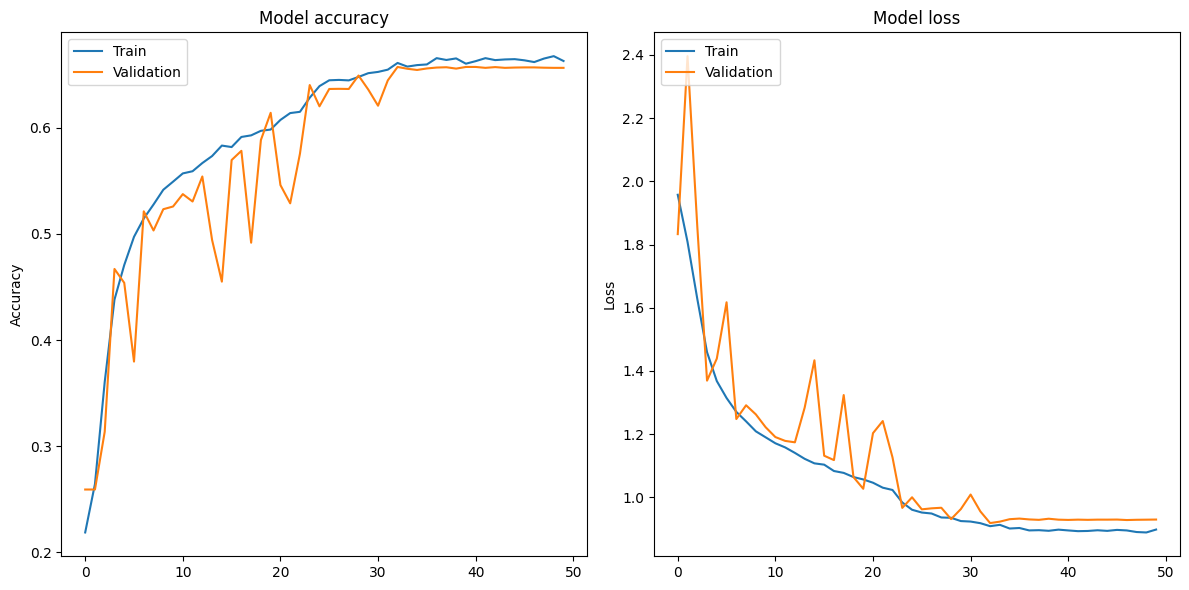

In [45]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [46]:
model.save("best_model.h5")

In [48]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

# Load pre-trained model
emotion_dict = {0: 'Surprise',1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Angry'}

trained_model = load_model("best_model.h5") # Replace with the actual path

# Load face cascade
try:
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
except Exception as e:
    print(f"Error loading cascade classifiers: {e}")

# Evaluate the model on the test set
predictions = trained_model.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_set.classes

# Initialize counts for correct and incorrect predictions for each emotion
correct_counts = {emotion: 0 for emotion in emotion_dict.values()}
incorrect_counts = {emotion: 0 for emotion in emotion_dict.values()}

# Count correct and incorrect predictions
for i in range(len(true_labels)):
    predicted_emotion = emotion_dict[predicted_labels[i]]
    true_emotion = emotion_dict[true_labels[i]]
    is_correct = predicted_emotion == true_emotion

    if is_correct:
        correct_counts[true_emotion] += 1
    else:
        incorrect_counts[true_emotion] += 1

# Calculate percentages
total_samples = len(true_labels)
percentages = {emotion: (correct_counts[emotion] / total_samples) * 100 for emotion in emotion_dict.values()}

# Print percentages
for emotion, percentage in percentages.items():
    print(f"Emotion: {emotion}, Percentage Correct: {percentage}%")


56/56 [==============================] - 21s 376ms/step
Emotion: Surprise, Percentage Correct: 7.302575714690065%
Emotion: Disgust, Percentage Correct: 0.8349844324936314%
Emotion: Fear, Percentage Correct: 4.924992923860741%
Emotion: Happy, Percentage Correct: 22.360600056609115%
Emotion: Neutral, Percentage Correct: 13.09085762807812%
Emotion: Sad, Percentage Correct: 8.802717237475234%
Emotion: Angry, Percentage Correct: 8.29323521086895%


In [88]:
##model_motion  with epoch 30 early stoping 9  accurcey 5.3
